In [84]:
import string

import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns

import nltk
nltk.download("stopwords")
nltk.download('wordnet')
nltk.download('vader_lexicon')

from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.sentiment import SentimentIntensityAnalyzer

pd.set_option('display.max_rows', None)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shrutirao/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/shrutirao/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/shrutirao/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [85]:
df = pd.read_csv('data/lab42_cleaned_data.csv', index_col=0)
df_j = pd.read_csv('data/lab42_cleaned_jan_data.csv', index_col=0)

# Combine Jans Dataset with Shrutis

In [86]:
df = pd.concat([df.drop(columns=['occupation', 'usage', 'recruitment']),
                df_j.drop(columns=['space usage', 'occupation', 'usage']) ]).reset_index(drop=True)

In [87]:
df.to_csv('data/lab42_cleaned_combined_data.csv')

# Grouping by Shared vs Individual Space

'Unsure': Unsure

## Group
'Round tables by the three plants (across wooden staircase)'
'Next to the lockers'
'Study corner next to the plant wall'
'Yellow/white chairs & tables (besides the wooden staircase)'
'Tables on the landing (with wooden floor) accessible by the black staircase'
'Green group study tables (between a row of plants and railing)'
'Group tables by the stairs'
'Open lounge area'
'Near the printer'
'Round tables by the coffee machine'

## Individual
'Library learning room'
'Green chairs by the entrance'
'Partly covered green chairs (along glass wall)'

In [54]:
group = ['Round tables by the three plants (across wooden staircase)',
                        'Next to the lockers',
                        'Study corner next to the plant wall',
                        'Yellow/white chairs & tables (besides the wooden staircase)',
                        'Tables on the landing (with wooden floor) accessible by the black staircase',
                        'Green group study tables (between a row of plants and railing)',
                        'Group tables by the stairs',
                        'Open lounge area',
                        'Near the printer',
                        'Round tables by the coffee machine']

individual =  ['Library learning room',
                             'Green chairs by the entrance',
                             'Partly covered green chairs (along glass wall)']

unsure = ["Unsure"]

def assign_types_to_spaces(space):
    if space in group:
        return "group"
    if space in individual:
        return "individual"
    if space in unsure:
        return "unsure"
    
def merge_spaces(df):
    df["space-type"] = df["space-ground-floor"] + df["space-1-floor"] + df["space-2-floor"] + df["space-3-floor"]
    df = df.drop(columns =["space-ground-floor", "space-1-floor", "space-2-floor", "space-3-floor"])
    
    return df


def create_group_solo_space_labels(df):
    spaces = ["ground-floor", "1-floor", "2-floor", "3-floor"]
    
    for space in spaces:
        df["space-" + space] = df[space].apply(lambda space: assign_types_to_spaces(space)).fillna("")
    
    return df


df = create_group_solo_space_labels(df)
df = merge_spaces(df)

In [55]:
df.floor.value_counts()

1st Floor       134
Ground floor     66
2nd Floor        16
3rd Floor        14
6th Floor         7
Name: floor, dtype: int64

# Overview of Respondents

In [5]:
df.occupation.value_counts()

Yes    114
No      11
Name: occupation, dtype: int64

In [6]:
df.recruitment.value_counts()

I will be only be participating in the survey     99
I would like to participate in a building walk    26
Name: recruitment, dtype: int64

# Students Across the Floors

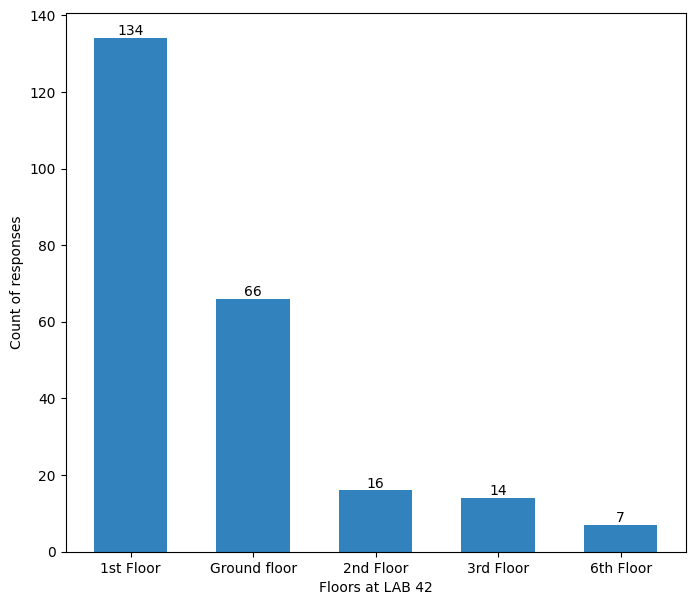

In [81]:
fig, ax = plt.subplots()
data = df.floor.value_counts()
data = pd.DataFrame(data).reset_index().rename(columns={"index": "Floor", "floor": "Count of Responses"})
width = 0.6

p=ax.bar(data.Floor, data["Count of Responses"], width, color = "#3182bd")
ax.bar_label(p, label_type='edge')
plt.ylabel("Count of responses")
plt.xlabel("Floors at LAB 42")
fig.set_size_inches(8, 7)
plt.savefig('plots/floors-responses.jpg', dpi=300, bbox_inches="tight")

### Grouped by Floor and Space Type

In [75]:
test = df.groupby(['floor', 'space-type'])['ground-floor', '1-floor', '2-floor', '3-floor'].count()
test['counts'] = test['ground-floor'] + test['1-floor'] + test['2-floor'] + test['3-floor']
test = test['counts'].reset_index().drop([0,4,10])

/var/folders/37/5q1f19yn0f19tsfhqd_3fsnh0000gn/T/ipykernel_28926/2757327659.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  test = df.groupby(['floor', 'space-type'])['ground-floor', '1-floor', '2-floor', '3-floor'].count()


<Figure size 800x700 with 0 Axes>

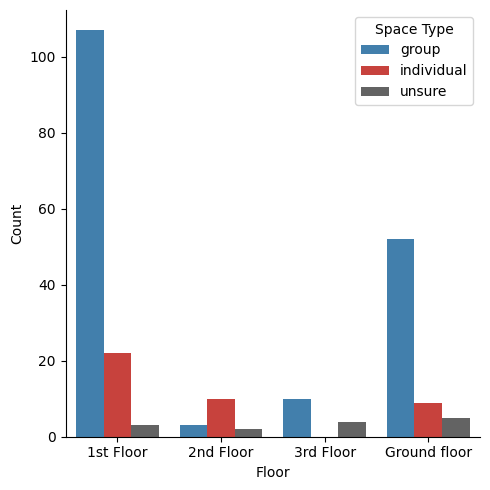

In [86]:
plt.figure(figsize=(8, 7))
custom_palette = {'group': '#3182bd',
                  'individual': '#de2d26',
                  'unsure': '#636363'}

plot = sns.catplot(x='floor',
                   y='counts',
                   hue='space-type',
                   kind='bar',
                   data=test,
                   legend=False,
                   palette=custom_palette
                  )

plt.xlabel('Floor')
plt.ylabel('Count')

ax = plot.ax
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[0:3], labels[0:3], title='Space Type')
plt.tight_layout()
plt.savefig('plots/floors-space-type.jpg', dpi=300, bbox_inches="tight")

In [37]:
df[df['floor'] == '6th Floor']

,floor,ground-floor,1-floor,2-floor,3-floor,emotion,comfort,space-type
4,6th Floor,NaN,NaN,NaN,NaN,"Hungry, a bit cold","Cold, quiet, well lit",
18,6th Floor,NaN,NaN,NaN,NaN,NaN,NaN,
37,6th Floor,NaN,NaN,NaN,NaN,"Tired, busy",Noisy (poor sound insulation between rooms),
38,6th Floor,NaN,NaN,NaN,NaN,Peaceful,Default brightness is a little bright,
41,6th Floor,NaN,NaN,NaN,NaN,Ok,Ok,
75,6th Floor,NaN,NaN,NaN,NaN,"Convenient, and calm sometime",I am quite comfortable with the overall enviro...,
123,6th Floor,NaN,NaN,NaN,NaN,Calm,8/10,


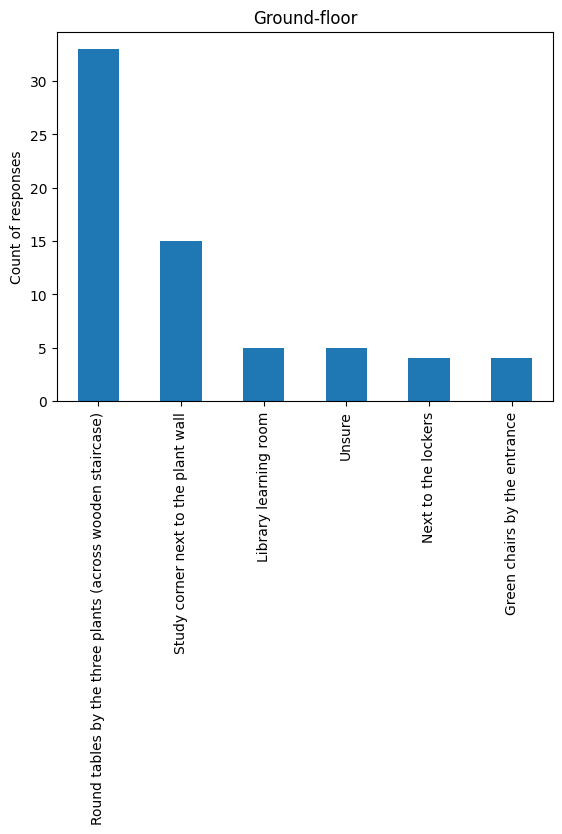

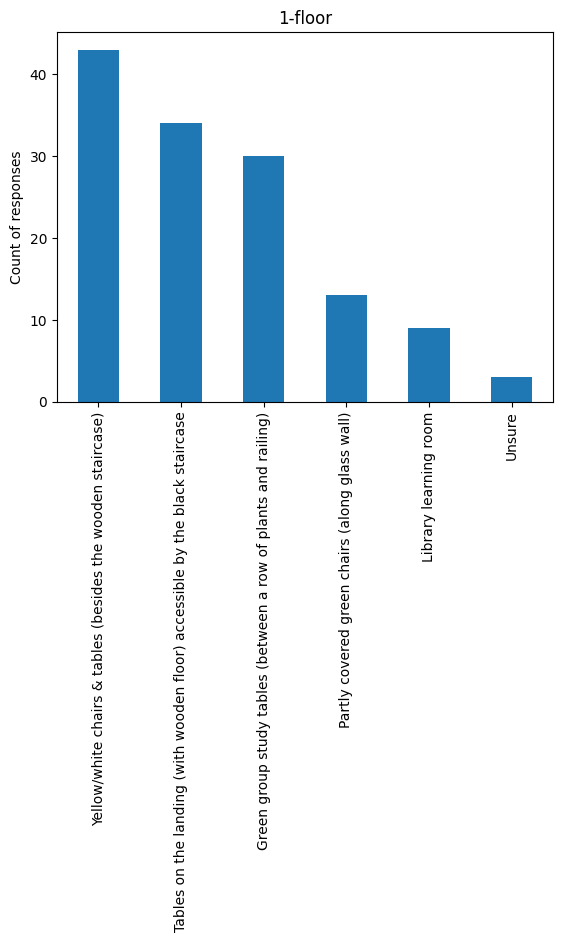

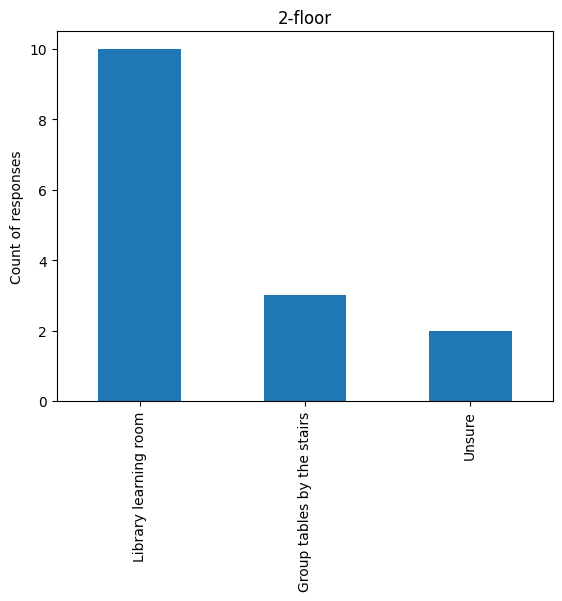

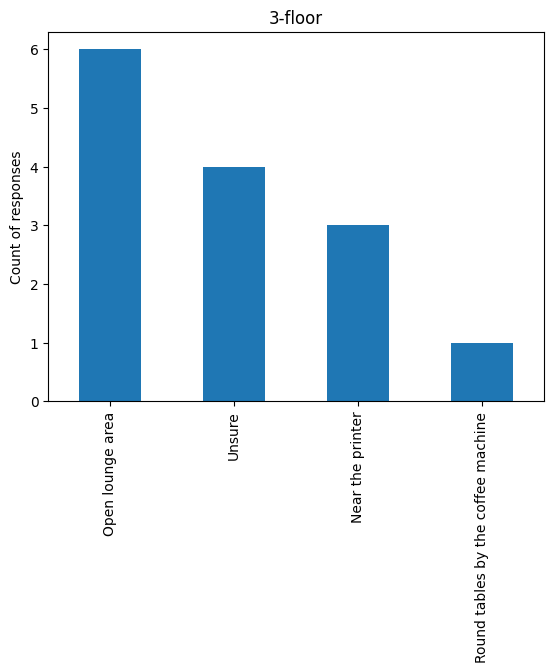

In [39]:
def plot_responses_rooms(floor):
    # ax = plt.subplot(2, 2, n + 1)
    p = df[floor].value_counts().plot.bar()
    # ax.bar_label(p, label_type='edge')
    plt.ylabel("Count of responses")
    plt.title(floor.capitalize())

# plt.figure(figsize=(15, 12))
# plt.subplots_adjust(hspace=3)
floors = ['ground-floor', '1-floor', '2-floor', '3-floor']

for floor in floors:
    fig, ax = plt.subplots()
    plot_responses_rooms(floor)
    plt.savefig('plots/' + floor + '.jpg',
            dpi=300, bbox_inches='tight')

# Emotions

In [56]:
df_emo = df.emotion.dropna()
df_emo = df_emo.apply(lambda x: x.replace('’', ''))

### Tokenise

In [57]:
import string

def apply_token(row):
    stop_words = set(stopwords.words("english"))
    stop_words.update(["like", "feel", 'bit', 'feels', 'im',
                      'much'])
    words_in_sent = word_tokenize(row)

    filtered_list = []
    
    for word in words_in_sent:
        if word.casefold() not in stop_words:
            filtered_list.append(word)
    
    return filtered_list

def cleanup(df_emo):
    combo_emo = []
    for row in df_emo:
        combo_emo.append(row)
    
    combo_emo = list(np.concatenate(combo_emo).flat)
    combo_emo = list(filter(lambda token: token not in string.punctuation,
                            combo_emo))
    combo_emo = [x.lower() for x in combo_emo]
    
    return combo_emo

In [58]:
df_emo = df_emo.apply(apply_token)
combo_emo_list = cleanup(df_emo)

In [68]:
def calc_frequency_distribution(lst, label):
    top_n = FreqDist(lst).most_common(20)
    # print(top_n)
    frequency_distribution = pd.Series(dict(top_n))
    plt.figure(figsize=(8, 7))

    sns.set_theme(style="ticks")
    sns.barplot(y=frequency_distribution.index,
                x=frequency_distribution.values,
                palette = 'hls',
                saturation = 8)
    plt.xlabel("Count of responses")
    plt.ylabel("Most frequently occuring words")
    plt.gcf().set_size_inches(5,7)
    plt.xlim(0,100)

    plt.savefig('plots/' + label + '-freq-dist.jpg',
            dpi=300, bbox_inches='tight')

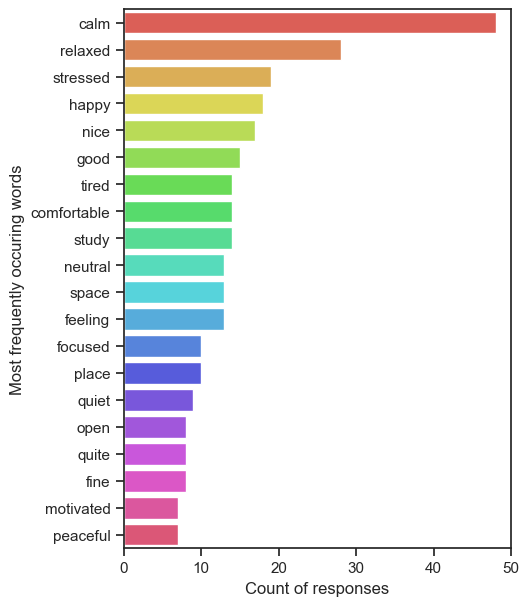

In [62]:
calc_frequency_distribution(combo_emo_list, 'emo')

calm (19), bit (6), nice (5), feel (4), quiet (4), neutral (4), relaxed (4), focused (4), noisy (3), cold (3), stressed (3), happy (3), motivated (3), peaceful (3), tired (3), good (3), study (3), building (3)

Interesting to note that words associated with emotion questions also included some words about comfort such as `cold` and `noisy`. Overall, we see that words associated with emotions are a mix of emotions, moods, sentiments, that are also typically associated with learning (`stressed`, `focused`, `motivated`)

### Lemmatisation

In [181]:
def lemmatiser(labels):
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in labels]
    return lemmatized_words

def check_collocations(lst):
    return nltk.Text(lst).collocations()
    
def find_collocations(df_emo):
    lem_emo = df_emo.apply(lemmatiser)
    combined_emos = list(np.concatenate(lem_emo.to_list()).flat)
    return check_collocations(combined_emos)

In [182]:
find_collocations(df_emo)

nothing special; natural light; ground floor; background noise;
student break; stressed upcoming; Stressed exam; quiet right; nice
place; day studying; place study; Nice quiet; stressed exam; feeling
fine; Pretty calm; good place; calm comfortable; calm Relaxed; study
Calm; calm relaxed


study calm were the most frequently occuring pair of words (collocations) in the list of emotions.

# Comfort

In [64]:
df_comfort = df.comfort.dropna()
df_comfort = df_comfort.apply(lambda x: x.replace('’', ''))

### Tokenise

In [65]:
df_comfort = df_comfort.apply(apply_token)
combo_comfort_list = cleanup(df_comfort)

In [66]:
combo_comfort_list = [word for word in combo_comfort_list if word != "'s"]

In [69]:
frequency_distribution = FreqDist(combo_comfort_list)
frequency_distribution.most_common(20)

[('comfortable', 93),
 ('light', 52),
 ('good', 45),
 ('noise', 44),
 ('temperature', 39),
 ('air', 31),
 ('cold', 27),
 ('nice', 26),
 ('pretty', 23),
 ('quality', 22),
 ('noisy', 21),
 ('quite', 20),
 ('little', 19),
 ('fine', 17),
 ('space', 16),
 ('people', 16),
 ('chairs', 15),
 ('enough', 12),
 ('plants', 12),
 ('perfect', 11)]

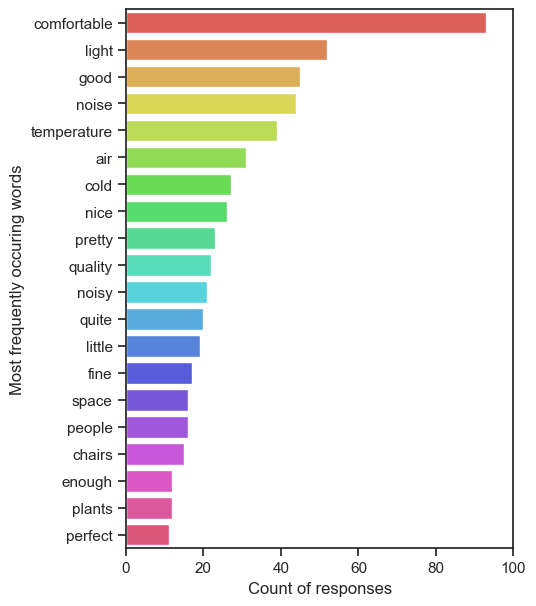

In [70]:
calc_frequency_distribution(combo_comfort_list, 'comfort')

'comfortable' (23), 'light'(12), 'cold' (10), 'good' (10), 'noise' (9), 'temperature' (8), 'air' (8), 'nice' (8), 'room' (7), ('pretty', 7), ('space', 5), ('quality', 5), ('window', 5), ('fine', 5), ('like', 5), ('noisy', 5), ('little', 5), ('well', 4), ('lighting', 4), ('warm', 4), ('lot', 4), ('make', 4), ('feel', 4), ('blinds', 4), ('dark', 4), ('natural', 4), ('ok', 4), ('perfect', 3)

Most focus on light and temperature followed by noise. People also noted overall space and comfort as a whole. 

### Lemmatisation

In [71]:
find_collocations(df_comfort)

NameError: name 'find_collocations' is not defined

Air quality was the most ferquently occuring word.

In [202]:
from collections import Counter
combo_comfort_cloud=Counter(combo_comfort_list)

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate_from_frequencies(combo_comfort_cloud)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

NameError: name 'WordCloud' is not defined

# Sentiment Analysis

In [72]:
def sentiment_analysis(df, label):
    analyzer = SentimentIntensityAnalyzer()
    df[label + '-polarity'] = df[label].apply(lambda x: analyzer.polarity_scores(str(x)))
    df = pd.concat([df, df[label + '-polarity'].apply(pd.Series)], axis=1)
    df[label + '-sentiment'] = df['compound'].apply(lambda x: 'positive' if x >0 else 'neutral' if x==0 else 'negative')

    print("Most positive emotion statement: ", df.loc[df['compound'].idxmax()].values)
    print("\n")
    print("Most negative emotion statement: ", df.loc[df['compound'].idxmin()].values)
    
    return df 

In [73]:
def plot_sentiment_analysis(df, label):
    sns.countplot(y=label+'-sentiment', 
                  data=df,
                  palette=['#b2d8d8',"#008080", '#db3d13'],
                  order=["positive", "negative", "neutral"])
    plt.ylabel("Sentiment for " + label + " Text")
    plt.xlabel("Count")
    # plt.xlim(0,45)
    plt.savefig('plots/' + label + '-sentiment-count.jpg',
                dpi=300, bbox_inches='tight')
    
    plt.clf()
    
    sns.boxplot(x='floor', y='compound', data=df)
    plt.xlabel("Floor")
    plt.ylabel("Sentiment Value \n (1 = Most Positive; 0 = Neutral; -1 = Most Negative)")
    plt.tick_params(bottom=False)
    plt.axhline(0, ls='--', c = 'grey')
    plt.savefig('plots/' + label + '-sentiment-distribution.jpg',
                dpi=300, bbox_inches='tight')
    

def plot_sentiment_analysis_spaces(df, label):
    df = df.where(df["space-type"] != "").dropna(how="all")
    f = plt.figure(figsize=(10, 6))
    sns.boxplot(x='space-type', y='compound', width=0.5,
 data=df)
    plt.xlabel("Space Type")
    plt.ylabel("Sentiment Value \n (1 = Most Positive; 0 = Neutral; -1 = Most Negative)")
    plt.tick_params(bottom=False)
    plt.axhline(0, ls='--', c = 'grey')
    plt.savefig('plots/lab42-' + label + '-space-wise-sentiment-distribution.jpg',
                dpi=300, bbox_inches='tight')

/var/folders/37/5q1f19yn0f19tsfhqd_3fsnh0000gn/T/ipykernel_31676/4155410158.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[label + '-polarity'] = df[label].apply(lambda x: analyzer.polarity_scores(str(x)))


Most positive emotion statement:  ['1st Floor' nan 'Partly covered green chairs (along glass wall)' nan nan
 'It is open, and this does not necessarily make me relaxed, it feels like i am standing in a hall/pass way, not really a study area. I like that it is naar window, where you can see people walking and going somewhere. I like it is fading rhe sunny side, makes me happy'
 'It is a little too noisey, and too spacious, it smells like building, temperature is comfortable, like the natural light '
 nan 'individual'
 {'neg': 0.0, 'neu': 0.709, 'pos': 0.291, 'compound': 0.9451} 0.0 0.709
 0.291 0.9451 'positive']


Most negative emotion statement:  ['Ground floor' 'Study corner next to the plant wall' nan nan nan
 'Having computer issues so stressed, not really focused '
 "Pretty good but it's a bit too loud and open to really focus"
 'I understand, and I agree to participate in the survey' 'group'
 {'neg': 0.479, 'neu': 0.521, 'pos': 0.0, 'compound': -0.6723} 0.479 0.521
 0.0 -0.6723 '

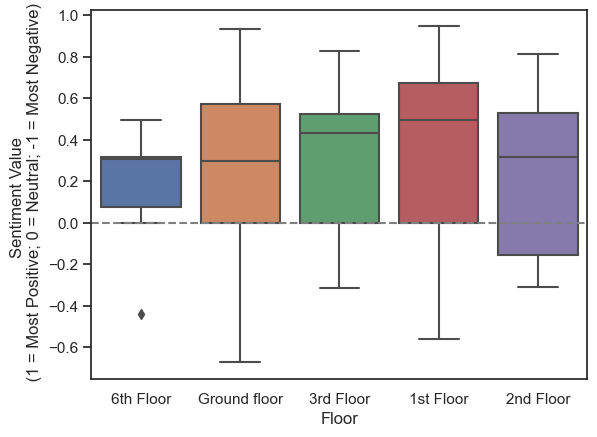

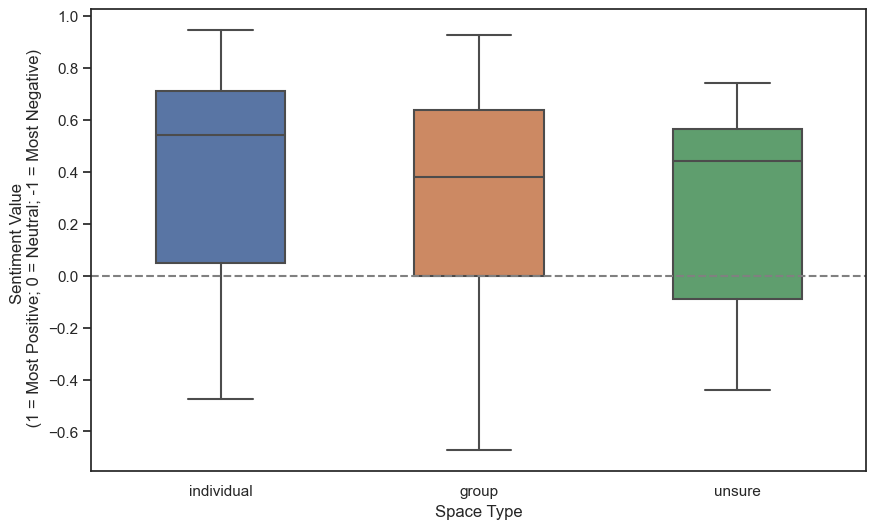

In [74]:
df = df.dropna(subset=['emotion'], how='all')
df_sent_emo = sentiment_analysis(df, 'emotion')
df_sent_emo.to_csv('data/sentiment_data/students-emo-lab42.csv')
plot_sentiment_analysis(df_sent_emo, 'emotion')
plot_sentiment_analysis_spaces(df_sent_emo, "emotion")

### Emotion: `Calm`

In [75]:
df_calm = df_sent_emo[['floor','emotion', 'emotion-sentiment']][df_sent_emo['emotion'].str.contains("calm")==True]

In [76]:
df_calm['emotion-sentiment']

4      positive
11     positive
14     positive
21     negative
54     positive
70     positive
71     positive
86     positive
96     positive
117    positive
120    positive
126    negative
133    positive
141    positive
147    positive
153    positive
176    positive
187    positive
193    positive
208    positive
210    positive
223    positive
236    positive
239    positive
Name: emotion-sentiment, dtype: object

## Comfort: `light`

Most positive emotion statement:  ['1st Floor' nan 'Partly covered green chairs (along glass wall)' nan nan
 'Calm. Motivated. '
 "I love sitting by the window to have more (natural) light. it's a bit dark otherwise and air quality could be better, but I'm allergic and therefore more sensitive. it's a bit too warm for my liking, but not necessarily unpleasant. I love the colours. Green always has a calming effect on me"
 nan 'individual' {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.6486}
 {'neg': 0.042, 'neu': 0.607, 'pos': 0.351, 'compound': 0.9654} 0.042
 0.607 0.351 0.9654 'positive']


Most negative emotion statement:  ['Ground floor' 'Study corner next to the plant wall' nan nan nan
 'Neutral'
 'My chair makes my back hurt and I the lack chalkboards gives me existential pain. 7/10'
 nan 'group' {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
 {'neg': 0.429, 'neu': 0.571, 'pos': 0.0, 'compound': -0.8402} 0.429 0.571
 0.0 -0.8402 'negative']


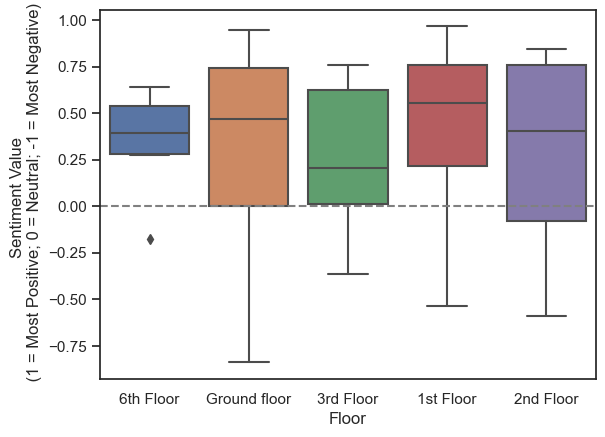

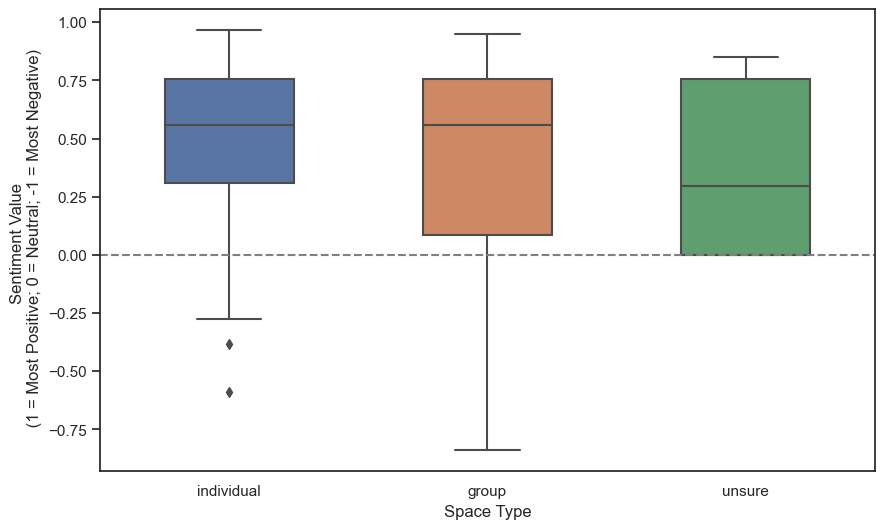

In [77]:
df = df.dropna(subset=['comfort'], how='all')
df_sent_comfort = sentiment_analysis(df, 'comfort')
df_sent_comfort.to_csv('data/sentiment_data/students-comfort-lab42.csv')
plot_sentiment_analysis(df_sent_comfort, 'comfort')
plot_sentiment_analysis_spaces(df_sent_comfort, "comfort")